In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel('HousePricePrediction.xlsx')

In [5]:
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotArea       1460 non-null   int64  
 4   LotConfig     1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   OverallCond   1460 non-null   int64  
 7   YearBuilt     1460 non-null   int64  
 8   YearRemodAdd  1460 non-null   int64  
 9   Exterior1st   1460 non-null   object 
 10  BsmtFinSF2    1460 non-null   float64
 11  TotalBsmtSF   1460 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 159.7+ KB


In [12]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,56.897260,10516.828082,5.575342,1971.267808,1984.865753,46.549315,1057.429452,180921.195890
std,421.610009,42.300571,9981.264932,1.112799,30.202904,20.645407,161.319273,438.705324,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,364.750000,20.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,795.750000,129975.000000
50%,729.500000,50.000000,9478.500000,5.000000,1973.000000,1994.000000,0.000000,991.500000,163000.000000
75%,1094.250000,70.000000,11601.500000,6.000000,2000.000000,2004.000000,0.000000,1298.250000,214000.000000
max,1459.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1474.000000,6110.000000,755000.000000


In [13]:
df.corr()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,1.000000,0.011156,-0.033226,0.012609,-0.012713,-0.021998,-0.005968,-0.015415,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,-0.059316,0.027850,0.040581,-0.065649,-0.238518,-0.084284
LotArea,-0.033226,-0.139781,1.000000,-0.005636,0.014228,0.013788,0.111170,0.260833,0.263843
OverallCond,0.012609,-0.059316,-0.005636,1.000000,-0.375983,0.073741,0.040229,-0.171098,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,-0.375983,1.000000,0.592855,-0.049107,0.391452,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.073741,0.592855,1.000000,-0.067759,0.291066,0.507101
BsmtFinSF2,-0.005968,-0.065649,0.111170,0.040229,-0.049107,-0.067759,1.000000,0.104810,-0.011378
TotalBsmtSF,-0.015415,-0.238518,0.260833,-0.171098,0.391452,0.291066,0.104810,1.000000,0.613581
SalePrice,-0.021917,-0.084284,0.263843,-0.077856,0.522897,0.507101,-0.011378,0.613581,1.000000


<AxesSubplot:>

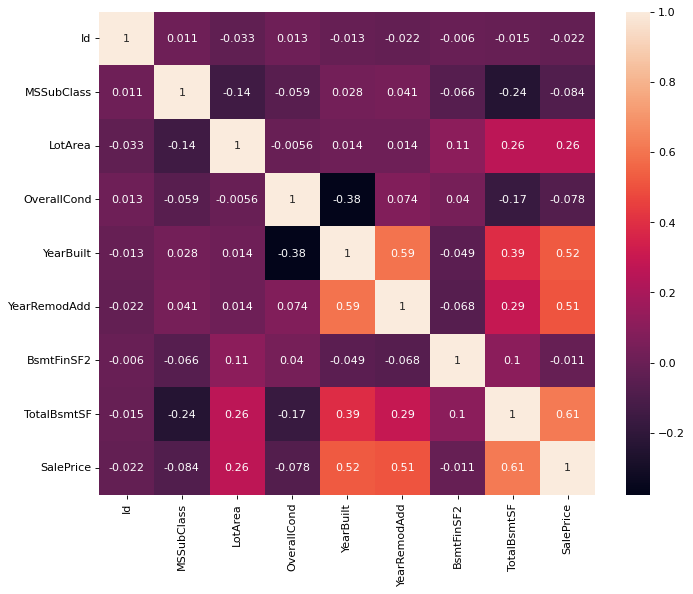

In [14]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(df.corr(),annot=True)

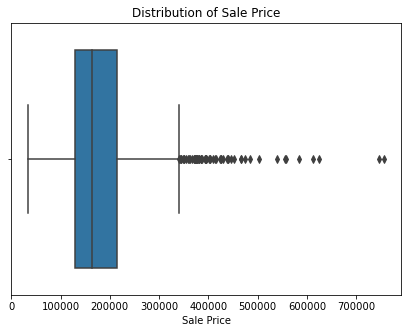

In [15]:
# Explore the distribution of the target variable 'SalePrice'
plt.figure(figsize=(7,5))
sns.boxplot(x=df['SalePrice'])
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.show()

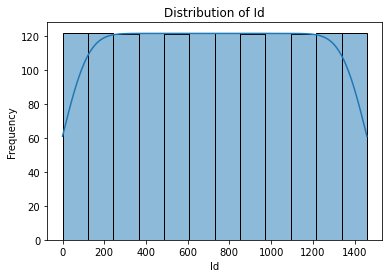

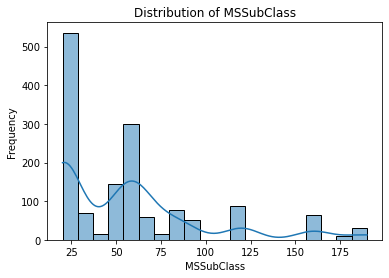

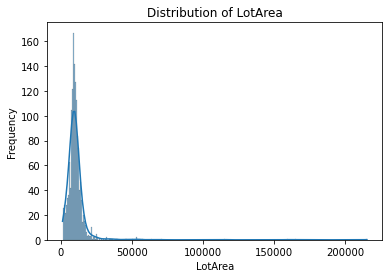

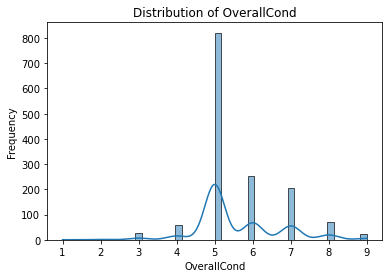

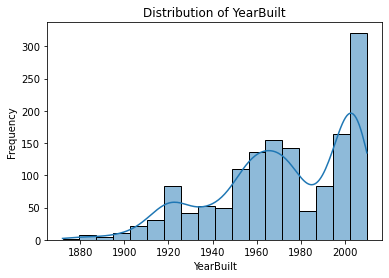

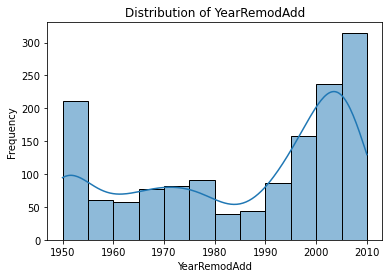

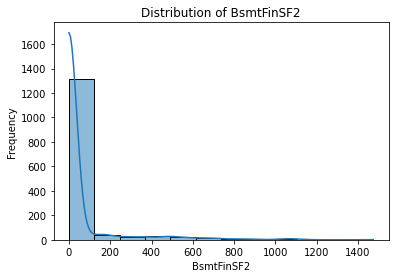

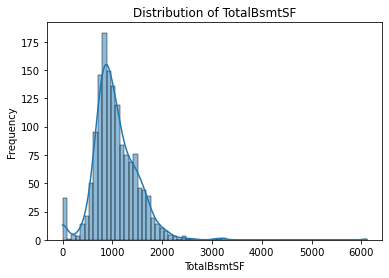

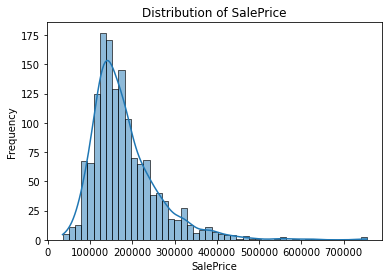

In [16]:
# Explore the distribution of numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

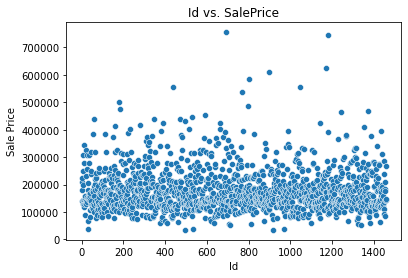

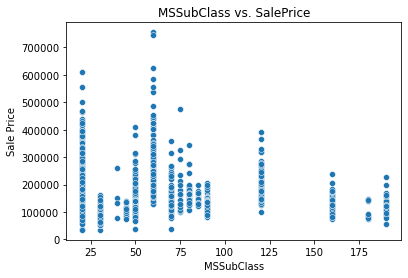

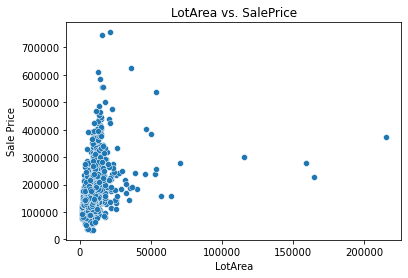

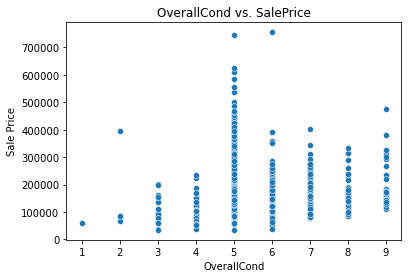

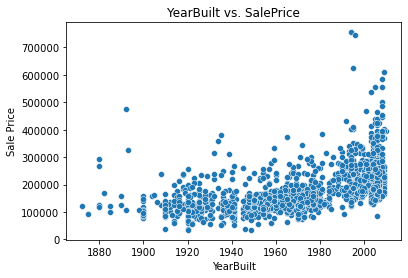

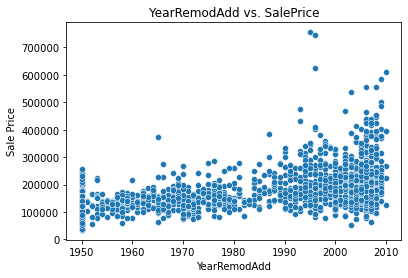

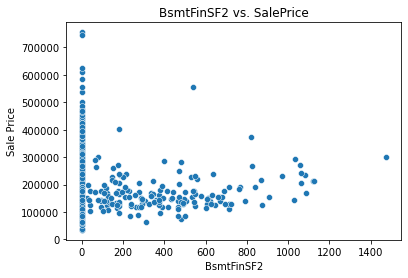

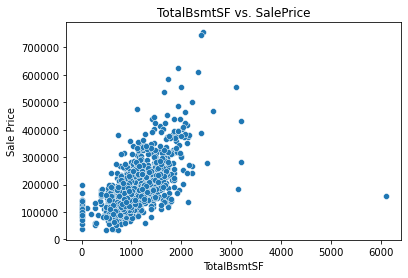

In [17]:
# Explore the relationships between numeric features and 'SalePrice'
for col in numeric_cols:
    if col != 'SalePrice':
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=col, y='SalePrice')
        plt.title(f'{col} vs. SalePrice')
        plt.xlabel(col)
        plt.ylabel('Sale Price')
        plt.show()

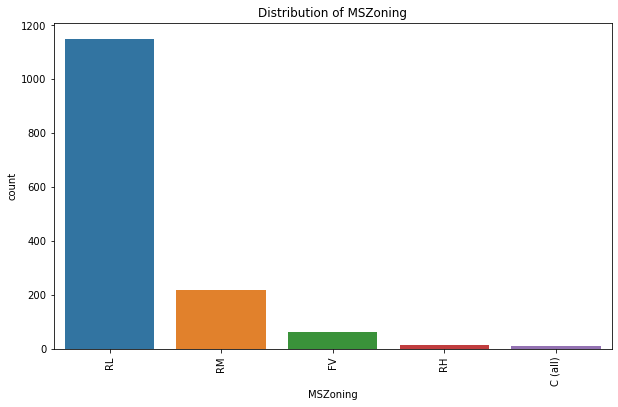

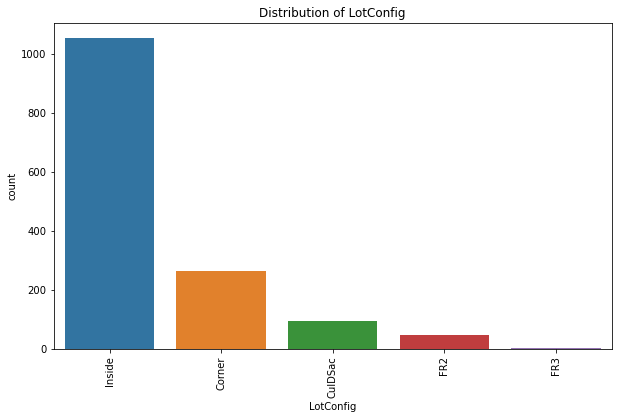

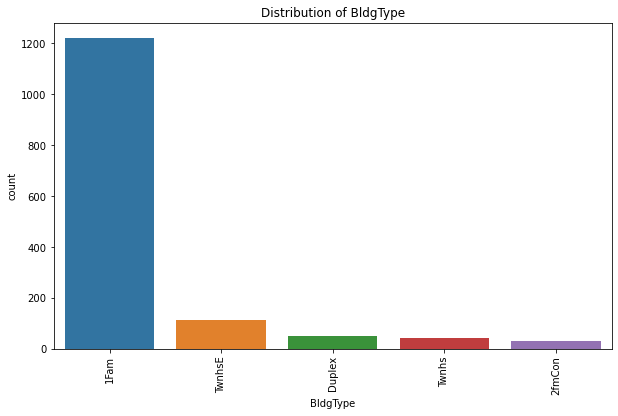

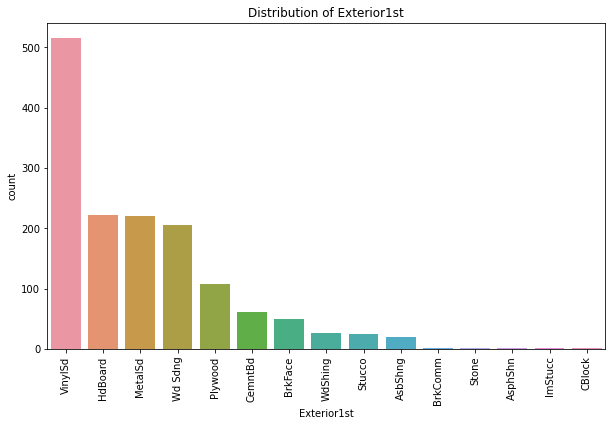

In [18]:
# Explore the distribution of categorical features
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

In [19]:
df.nunique()

Id              1460
MSSubClass        15
MSZoning           5
LotArea         1073
LotConfig          5
BldgType           5
OverallCond        9
YearBuilt        112
YearRemodAdd      61
Exterior1st       15
BsmtFinSF2       144
TotalBsmtSF      721
SalePrice        663
dtype: int64

In [20]:
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0


In [21]:
#sns.pairplot(data=df,hue='SalePrice')

In [22]:
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [23]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [24]:
df=pd.get_dummies(df)

In [25]:
df

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0,60,8450,5,2003,2003,0.0,856.0,208500.0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,60,11250,5,2001,2002,0.0,920.0,223500.0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,7917,5,1999,2000,0.0,953.0,175000.0,0,...,0,0,0,0,0,0,0,1,0,0
1456,1456,20,13175,6,1978,1988,163.0,1542.0,210000.0,0,...,0,0,0,0,1,0,0,0,0,0
1457,1457,70,9042,9,1941,2006,0.0,1152.0,266500.0,0,...,1,0,0,0,0,0,0,0,0,0
1458,1458,20,9717,6,1950,1996,1029.0,1078.0,142125.0,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [27]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [30]:
lr_grid={'fit_intercept': [True,False],
         'copy_X':[True,False],
         'n_jobs':[2,4,6],
         'positive':[True,False]}

In [31]:
lr_model1=GridSearchCV(lr_model,param_grid=lr_grid,cv=5,verbose=2)
lr_model1.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=4, positive=True; total 

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [2, 4, 6],
                         'positive': [True, False]},
             verbose=2)

In [32]:
lr_model1.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'positive': False}

In [33]:
final_lr_model=LinearRegression(copy_X= True, fit_intercept= True, n_jobs= 2, positive= True)
final_lr_model.fit(X_train,y_train)

LinearRegression(n_jobs=2, positive=True)

In [34]:
pred=final_lr_model.predict(X_test)

In [35]:
mean_absolute_error(y_test,pred)

34603.802443686356

In [36]:
np.sqrt(mean_squared_error(y_test,pred))

59715.500181993986

In [37]:
df.iloc[1455].values

array([1.455e+03, 6.000e+01, 7.917e+03, 5.000e+00, 1.999e+03, 2.000e+03,
       0.000e+00, 9.530e+02, 1.750e+05, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00])

In [38]:
new_data=[[1.455e+03, 6.000e+01, 7.917e+03, 5.000e+00, 1.999e+03, 2.000e+03,
       0.000e+00, 9.530e+02, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00]]

In [39]:
final_lr_model.predict(new_data)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([215639.82170917])

In [40]:
preds=final_lr_model.predict(X)

In [41]:
pd.DataFrame({'Original':df['SalePrice'],
              'Predicted':preds})

,Original,Predicted
0,208500.0,211926.464232
1,181500.0,193587.480134
2,223500.0,219430.061590
3,140000.0,124890.305064
4,250000.0,244410.174798
...,...,...
1455,175000.0,215639.821709
1456,210000.0,207829.611325
1457,266500.0,236688.000712
1458,142125.0,157358.153397
